In [3]:
from create_graph import TSPGraphCreator
import configparser
from test_solution import get_graph_data
from TSP import TSP
from SimulatedAnnealing import SimulatedAnnealing
from graph_from_csv import GraphCreator
import pandas as pd
import itertools
from GenerateData import generate_data
import time

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:

config = configparser.ConfigParser()
config.read('config.ini')
db_host = config.get('Database', 'DB_HOST')
db_user = config.get('Database', 'DB_USER')
db_password = config.get('Database', 'DB_PASSWORD')

vrp_graph = TSPGraphCreator(db_host, db_user, db_password)
vrp_graph.create_vrp_graph()
vrp_graph.close()

In [6]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'Hub')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['Hub', 'Location1', 'Location2', 'Location4', 'Location3', 'Location1'], 43.0)


In [8]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters)
best_results

[((2000, 0.1, 10), 43.0, 0.0004379749298095703),
 ((4000, 0.1, 10), 43.0, 0.0005121231079101562),
 ((1000, 0.3, 10), 43.0, 0.0006756782531738281),
 ((1000, 0.1, 20), 43.0, 0.0006761550903320312),
 ((2000, 0.3, 10), 43.0, 0.0008215904235839844),
 ((4000, 0.3, 10), 43.0, 0.0009195804595947266),
 ((2000, 0.1, 20), 43.0, 0.0012972354888916016),
 ((1000, 0.3, 20), 43.0, 0.0014934539794921875),
 ((1000, 0.1, 40), 43.0, 0.002193450927734375),
 ((1000, 0.6, 10), 43.0, 0.002691030502319336),
 ((2000, 0.6, 10), 43.0, 0.0030934810638427734),
 ((4000, 0.1, 40), 43.0, 0.003404855728149414),
 ((2000, 0.1, 40), 43.0, 0.003961324691772461),
 ((4000, 0.6, 10), 43.0, 0.004141092300415039),
 ((2000, 0.3, 40), 43.0, 0.007659196853637695),
 ((1000, 0.6, 20), 43.0, 0.007915973663330078),
 ((4000, 0.3, 40), 43.0, 0.008226394653320312),
 ((2000, 0.6, 20), 43.0, 0.008645057678222656),
 ((4000, 0.6, 20), 43.0, 0.010165929794311523),
 ((1000, 0.6, 40), 43.0, 0.025728464126586914),
 ((2000, 0.6, 40), 43.0, 0.0297

(2000, 0.1, 10)


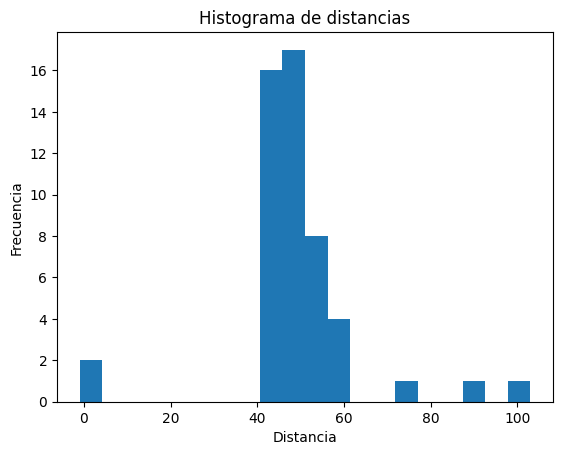

In [9]:
print(best_results[0][0])
SimulatedAnnealing.plot_n_results(simulated_annealing, 50, 10, *best_results[0][0])


In [10]:
df = pd.read_csv('random_distance_matrix.csv')
df.fillna(-1, inplace=True)
graph_creator = GraphCreator(db_host, db_user, db_password)
graph_creator.create_graph(df)
graph_creator.close()

In [11]:
graph_data = get_graph_data(db_host, db_user, db_password)

tsp = TSP(graph_data, 'l1')
simulated_annealing = SimulatedAnnealing(tsp)
print(simulated_annealing.best_of_x(x=40, initial_temperature=2000, n=15,
                                    cooling_factor=0.1, minimum_temperature=0.99))


(['l1', 'l7', 'l10', 'l14', 'l6', 'l5', 'l4', 'l13', 'l8', 'l2', 'l3', 'l9', 'l11', 'l12', 'l15'], 50.0)


In [12]:
# Esto puede tomar varios minutos
parameters = {
        'initial_temperature': [1000, 2000, 4000],
        'cooling_factor': [0.1, 0.3, 0.6],
        'n': [10, 20, 40]
    }

best_results = simulated_annealing.get_best_parameters(parameters, executions_per_combination=30)
best_results

[((1000, 0.3, 40), 65.0, 0.0099639892578125),
 ((2000, 0.6, 40), 65.0, 0.04214739799499512),
 ((1000, 0.1, 10), 66.0, 0.0014121532440185547),
 ((1000, 0.3, 10), 66.0, 0.0026175975799560547),
 ((4000, 0.1, 10), 66.0, 0.0037729740142822266),
 ((4000, 0.1, 20), 66.0, 0.005269765853881836),
 ((4000, 0.6, 10), 66.0, 0.01007080078125),
 ((2000, 0.6, 20), 66.0, 0.020447492599487305),
 ((2000, 0.3, 20), 67.0, 0.008191585540771484),
 ((4000, 0.3, 20), 67.0, 0.011927127838134766),
 ((1000, 0.1, 40), 68.0, 0.004251003265380859),
 ((4000, 0.3, 10), 69.0, 0.0041964054107666016),
 ((1000, 0.6, 10), 69.0, 0.007622241973876953),
 ((4000, 0.1, 40), 69.0, 0.010488510131835938),
 ((4000, 0.6, 20), 69.0, 0.017426490783691406),
 ((2000, 0.1, 10), 70.0, 0.0024564266204833984),
 ((2000, 0.6, 10), 70.0, 0.005907535552978516),
 ((4000, 0.3, 40), 70.0, 0.01932239532470703),
 ((2000, 0.3, 10), 71.0, 0.0042498111724853516),
 ((1000, 0.1, 20), 72.0, 0.002196073532104492),
 ((1000, 0.3, 20), 72.0, 0.005338668823242

(1000, 0.3, 40)


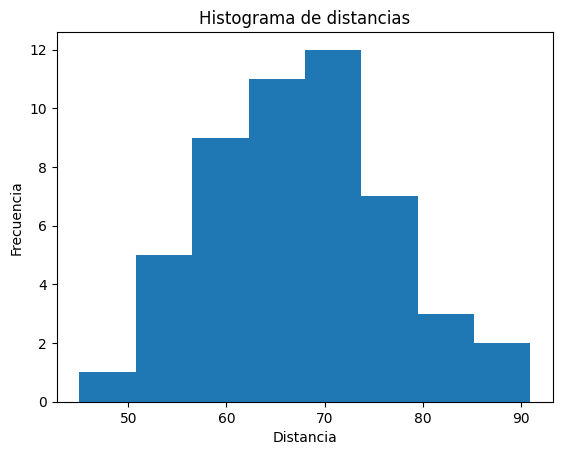

In [13]:
print(best_results[0][0])
simulated_annealing.plot_n_results(50, 10, *best_results[0][0])

In [14]:
for n in [5, 10, 20, 40, 60]:
    generate_data(n)

    # Create graph
    df = pd.read_csv('distance_matrix.csv')
    df.fillna(-1, inplace=True)
    graph_creator = GraphCreator(db_host, db_user, db_password)
    graph_creator.create_graph(df)
    graph_creator.close()

    print("Matriz de tamaño {n}")
    %timeit simulated_annealing.best_of_x(10, 10, *best_results[0][0])
    

Matriz de tamaño {n}
161 ms ± 5.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño {n}
166 ms ± 8.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño {n}
157 ms ± 7.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño {n}
168 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Matriz de tamaño {n}
179 ms ± 5.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
